## Problem Statement: Prepare a model for glass classification using KNN

In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')

In [6]:
data=pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

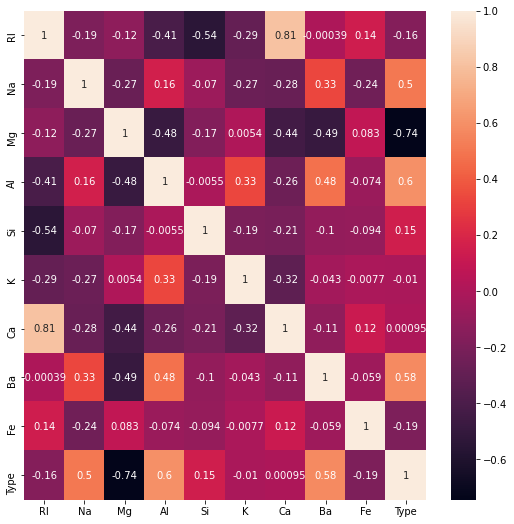

In [8]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)

In [9]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [10]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(213, 10)

In [13]:
data['Ba'].value_counts()

0.00    175
0.09      2
1.59      2
0.11      2
0.64      2
1.57      2
1.64      1
1.06      1
0.81      1
1.19      1
0.61      1
1.63      1
3.15      1
0.15      1
0.06      1
1.38      1
0.53      1
0.63      1
0.56      1
2.20      1
0.76      1
2.88      1
0.67      1
0.66      1
0.24      1
0.54      1
1.68      1
0.40      1
0.14      1
1.67      1
1.55      1
1.71      1
0.27      1
0.69      1
Name: Ba, dtype: int64

In [14]:
data['Fe'].value_counts()

0.00    143
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.28      3
0.07      3
0.14      3
0.22      3
0.12      3
0.16      3
0.15      2
0.08      2
0.19      2
0.05      1
0.37      1
0.25      1
0.30      1
0.35      1
0.03      1
0.51      1
0.20      1
0.34      1
0.06      1
0.32      1
0.01      1
0.31      1
0.29      1
0.21      1
0.18      1
0.26      1
Name: Fe, dtype: int64

In [15]:
array = data.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [18]:
X = array[:,0:9]
Y = array[:,9]
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [19]:
scale = StandardScaler()
scaled_data = scale.fit_transform(X)

In [20]:
scaled_data

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [21]:
X=scaled_data

In [22]:
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [23]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7.])

# Train and Test Split

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [76]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

### Test data

In [78]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 2., 1., 2., 7., 7., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2.,
       7., 2., 2., 1., 1., 2., 2., 1., 1., 2., 7., 2., 2., 5., 1., 1., 7.,
       1., 6., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 7.,
       7., 1., 7., 1., 2., 7., 1., 1., 2., 2., 2., 2., 1.])

In [91]:
pd.Series(y_pred).value_counts()

1.0    30
2.0    23
7.0     9
5.0     1
6.0     1
dtype: int64

In [102]:
model.score(x_test,y_test)

0.703125

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred,y_test)
confusion_matrix

array([[20,  5,  5,  0,  0,  0],
       [ 5, 14,  0,  2,  0,  2],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  9]], dtype=int64)

In [103]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.80      0.73        25
         2.0       0.61      0.74      0.67        19
         3.0       0.00      0.00      0.00         5
         5.0       1.00      0.33      0.50         3
         6.0       1.00      1.00      1.00         1
         7.0       1.00      0.82      0.90        11

    accuracy                           0.70        64
   macro avg       0.71      0.61      0.63        64
weighted avg       0.68      0.70      0.68        64



### Train data

In [99]:
pred_train = model.predict(x_train)  
pred_train

array([5., 2., 2., 1., 7., 7., 2., 2., 2., 1., 2., 2., 1., 6., 2., 1., 1.,
       2., 1., 5., 5., 6., 1., 2., 1., 2., 6., 7., 1., 1., 1., 7., 1., 5.,
       2., 6., 1., 1., 2., 5., 2., 1., 1., 2., 2., 1., 1., 2., 3., 2., 2.,
       2., 2., 2., 1., 1., 1., 3., 2., 1., 1., 5., 7., 2., 2., 1., 7., 7.,
       1., 1., 2., 1., 1., 5., 2., 1., 1., 7., 1., 1., 2., 1., 5., 1., 1.,
       1., 1., 1., 5., 2., 1., 2., 1., 2., 1., 1., 1., 7., 2., 2., 2., 1.,
       7., 1., 1., 7., 1., 1., 2., 1., 7., 2., 5., 2., 2., 1., 1., 1., 7.,
       1., 5., 1., 2., 2., 2., 3., 1., 1., 1., 6., 1., 1., 1., 2., 6., 2.,
       2., 1., 2., 2., 3., 7., 1., 2., 2., 2., 7., 7., 2.])

In [100]:
pd.Series(pred_train).value_counts()

1.0    62
2.0    50
7.0    16
5.0    11
6.0     6
3.0     4
dtype: int64

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(pred_train,y_train)
confusion_matrix

array([[39, 13,  7,  1,  0,  2],
       [ 4, 42,  2,  0,  2,  0],
       [ 1,  0,  3,  0,  0,  0],
       [ 0,  2,  0,  8,  0,  1],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  1,  0, 15]], dtype=int64)

In [89]:
model.score(x_train,y_train)

0.7583892617449665

In [104]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

         1.0       0.63      0.89      0.74        44
         2.0       0.84      0.74      0.79        57
         3.0       0.75      0.25      0.38        12
         5.0       0.73      0.80      0.76        10
         6.0       1.00      0.75      0.86         8
         7.0       0.94      0.83      0.88        18

    accuracy                           0.76       149
   macro avg       0.81      0.71      0.73       149
weighted avg       0.78      0.76      0.75       149



# Using KFold

In [125]:
kfold = KFold(n_splits=10)

model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, X, Y, cv=kfold)
results

array([0.77272727, 0.90909091, 0.81818182, 0.76190476, 0.47619048,
       0.33333333, 0.47619048, 0.14285714, 0.19047619, 0.95238095])

In [126]:
print(results.mean())

0.5833333333333334


## Grid Search for Algorithm Tuning

In [109]:
# Grid Search for Algorithm Tuning
import numpy 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [110]:
n_neighbors = numpy.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)

In [111]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [112]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


In [138]:
grid_pred = grid.predict(X)
grid_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 3., 2., 1., 1., 1., 3., 3.,
       2., 1., 3., 1., 3., 2., 3., 2., 2., 5., 2., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 2., 1., 6., 6., 6., 6., 2., 6., 6., 2., 6., 2., 7., 2.,
       2., 1., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 5., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [140]:
pd.Series(grid_pred).value_counts()

1.0    91
2.0    74
7.0    23
5.0    11
6.0     8
3.0     6
dtype: int64

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(grid_pred,Y)
confusion_matrix

array([[69, 14,  6,  1,  0,  1],
       [ 0, 62,  5,  2,  2,  3],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  1],
       [ 0,  0,  0,  0,  7,  1],
       [ 0,  0,  0,  0,  0, 23]], dtype=int64)

In [141]:
grid.score(X,Y)

0.8309859154929577

In [143]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,grid_pred))

              precision    recall  f1-score   support

         1.0       0.76      1.00      0.86        69
         2.0       0.84      0.82      0.83        76
         3.0       1.00      0.35      0.52        17
         5.0       0.91      0.77      0.83        13
         6.0       0.88      0.78      0.82         9
         7.0       1.00      0.79      0.88        29

    accuracy                           0.83       213
   macro avg       0.90      0.75      0.79       213
weighted avg       0.85      0.83      0.82       213



### Visualizing the CV

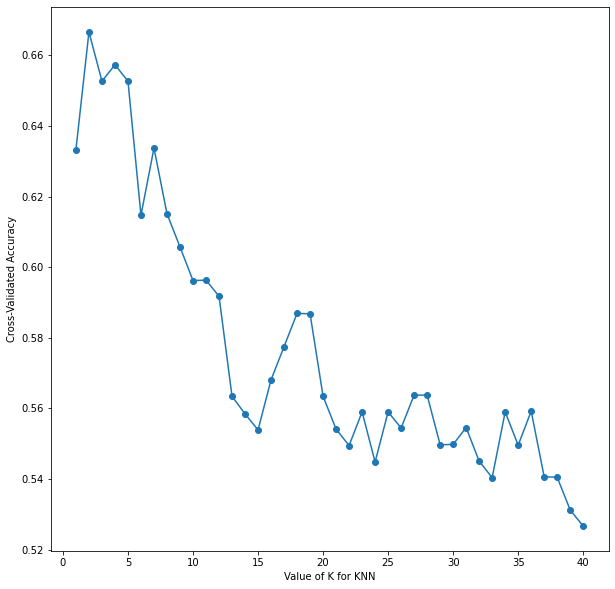

0.6666666666666667


In [144]:
import matplotlib.pyplot as plt 
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(score.mean())
# plot to see clearly
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print(max(k_scores))

In [119]:
import pandas as pd
pd.DataFrame(k_scores).sort_values(0)

,0
39,0.526689
38,0.531229
32,0.540421
37,0.540532
36,0.540642
23,0.544850
31,0.545072
21,0.549502
34,0.549612
28,0.549723


#### Using Stratified KFold

In [127]:
from sklearn.model_selection import StratifiedKFold

In [128]:
kfold = StratifiedKFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)

results.mean()

[0.59090909 0.59090909 0.81818182 0.61904762 0.66666667 0.52380952
 0.71428571 0.61904762 0.66666667 0.61904762]


0.6428571428571429

### Visualizing the CV

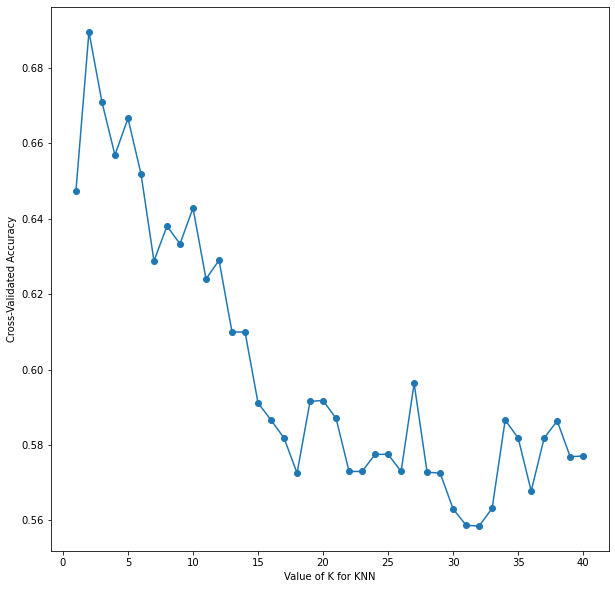

0.6896103896103897


In [145]:
import matplotlib.pyplot as plt 
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# choose k between 1 to 41
k_range = range(1, 41)
k_scores1 = []
kfold = StratifiedKFold(n_splits=10)
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=kfold)
    k_scores1.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores1, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
print(max(k_scores1))

In [133]:
import pandas as pd
pd.DataFrame(k_scores1).sort_values(0)

,0
31,0.558442
30,0.558658
29,0.562987
32,0.563203
35,0.567749
17,0.572511
28,0.572511
27,0.572727
21,0.572944
25,0.572944
